# Support Vector Regression

There are three different implementations of Support Vector Regression: 
SVR, NuSVR and LinearSVR. 

LinearSVR provides a faster implementation than SVR but only considers linear kernels, 
while NuSVR implements a slightly different formulation than SVR and LinearSVR. 

See Implementation details for further details.


In [1]:
#Boston Housing Dataset: Load the boston dataset.
from sklearn.datasets import load_boston
boston = load_boston()

#Creating feature and target arrays
X, y = boston.data, boston.target
columns = boston.feature_names

X=X[y<50]
y=y[y<50]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False).fit(X)
scaler.transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)

## The Optimization Problem

$$
\begin{align}\begin{aligned}\min_ {w, b, \zeta, \zeta^*} \frac{1}{2} ||w||^2 + C \sum_{i=1}^{n} (\zeta_i + \zeta_i^*)\\\begin{split}\textrm {subject to } & y_i - (w^T \phi (x_i) + b) \leq \varepsilon + \zeta_i,\\
                      & (w^T \phi (x_i) + b) - y_i \leq \varepsilon + \zeta_i^*,\\
                      & \zeta_i, \zeta_i^* \geq 0, i=1, ..., n\end{split}\end{aligned}\end{align}
$$

where $\phi$ is the kernel map that can be chosen as 
 - linear: $\langle x, x'\rangle$
 - poly: $(\gamma \langle x, x'\rangle + r)^d$ where $\gamma,\, d ,\, r$ are specified by keyword gamma, degree and coef0 respectively.
 - rbf - radial basis function: $\exp(-\gamma \|x-x'\|^2)$
 - neural networks (sigmoid): $\tanh(\gamma \langle x,x'\rangle + r)$

In [7]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.svm import SVR
import numpy as np

regressor = SVR()
parameters = {'C': [0.1, 1, 10],
             'epsilon': [0.001, 0.01, 1],
             'gamma':['auto'],
             'kernel': ['linear', 'poly','rbf'],
             'degree': [2,3,5]
             }

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3, verbose = 10,scoring ='neg_mean_absolute_error') #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV 1/3; 1/81] START C=0.1, degree=2, epsilon=0.001, gamma=auto, kernel=linear..
[CV 1/3; 1/81] END C=0.1, degree=2, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.0s
[CV 2/3; 1/81] START C=0.1, degree=2, epsilon=0.001, gamma=auto, kernel=linear..
[CV 2/3; 1/81] END C=0.1, degree=2, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.0s
[CV 3/3; 1/81] START C=0.1, degree=2, epsilon=0.001, gamma=auto, kernel=linear..
[CV 3/3; 1/81] END C=0.1, degree=2, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.0s
[CV 1/3; 2/81] START C=0.1, degree=2, epsilon=0.001, gamma=auto, kernel=poly....
[CV 1/3; 2/81] END C=0.1, degree=2, epsilon=0.001, gamma=auto, kernel=poly; total time=   0.0s
[CV 2/3; 2/81] START C=0.1, degree=2, epsilon=0.001, gamma=auto, kernel=poly....
[CV 2/3; 2/81] END C=0.1, degree=2, epsilon=0.001, gamma=auto, kernel=poly; total time=   0.0s
[CV 3/3; 2/81] START C=0.1, degree=2, epsilon=0.001,

[CV 1/3; 17/81] END C=0.1, degree=3, epsilon=1, gamma=auto, kernel=poly; total time=   0.0s
[CV 2/3; 17/81] START C=0.1, degree=3, epsilon=1, gamma=auto, kernel=poly.......
[CV 2/3; 17/81] END C=0.1, degree=3, epsilon=1, gamma=auto, kernel=poly; total time=   0.0s
[CV 3/3; 17/81] START C=0.1, degree=3, epsilon=1, gamma=auto, kernel=poly.......
[CV 3/3; 17/81] END C=0.1, degree=3, epsilon=1, gamma=auto, kernel=poly; total time=   0.0s
[CV 1/3; 18/81] START C=0.1, degree=3, epsilon=1, gamma=auto, kernel=rbf........
[CV 1/3; 18/81] END C=0.1, degree=3, epsilon=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV 2/3; 18/81] START C=0.1, degree=3, epsilon=1, gamma=auto, kernel=rbf........
[CV 2/3; 18/81] END C=0.1, degree=3, epsilon=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV 3/3; 18/81] START C=0.1, degree=3, epsilon=1, gamma=auto, kernel=rbf........
[CV 3/3; 18/81] END C=0.1, degree=3, epsilon=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV 1/3; 19/81] START C=0.1, degree=5, epsilon

[CV 2/3; 45/81] END C=1, degree=3, epsilon=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV 3/3; 45/81] START C=1, degree=3, epsilon=1, gamma=auto, kernel=rbf..........
[CV 3/3; 45/81] END C=1, degree=3, epsilon=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV 1/3; 46/81] START C=1, degree=5, epsilon=0.001, gamma=auto, kernel=linear...
[CV 1/3; 46/81] END C=1, degree=5, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.0s
[CV 2/3; 46/81] START C=1, degree=5, epsilon=0.001, gamma=auto, kernel=linear...
[CV 2/3; 46/81] END C=1, degree=5, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.0s
[CV 3/3; 46/81] START C=1, degree=5, epsilon=0.001, gamma=auto, kernel=linear...
[CV 3/3; 46/81] END C=1, degree=5, epsilon=0.001, gamma=auto, kernel=linear; total time=   0.0s
[CV 1/3; 47/81] START C=1, degree=5, epsilon=0.001, gamma=auto, kernel=poly.....
[CV 1/3; 47/81] END C=1, degree=5, epsilon=0.001, gamma=auto, kernel=poly; total time=   0.0s
[CV 2/3; 47/81] START C=1, degree=5

[CV 2/3; 65/81] END C=10, degree=3, epsilon=0.001, gamma=auto, kernel=poly; total time=   0.0s
[CV 3/3; 65/81] START C=10, degree=3, epsilon=0.001, gamma=auto, kernel=poly....
[CV 3/3; 65/81] END C=10, degree=3, epsilon=0.001, gamma=auto, kernel=poly; total time=   0.0s
[CV 1/3; 66/81] START C=10, degree=3, epsilon=0.001, gamma=auto, kernel=rbf.....
[CV 1/3; 66/81] END C=10, degree=3, epsilon=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV 2/3; 66/81] START C=10, degree=3, epsilon=0.001, gamma=auto, kernel=rbf.....
[CV 2/3; 66/81] END C=10, degree=3, epsilon=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV 3/3; 66/81] START C=10, degree=3, epsilon=0.001, gamma=auto, kernel=rbf.....
[CV 3/3; 66/81] END C=10, degree=3, epsilon=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV 1/3; 67/81] START C=10, degree=3, epsilon=0.01, gamma=auto, kernel=linear...
[CV 1/3; 67/81] END C=10, degree=3, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s
[CV 2/3; 67/81] START C=10,

In [8]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: -2.136486 using {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'rbf'}
-2.883030 (0.220945) with: {'C': 0.1, 'degree': 2, 'epsilon': 0.001, 'gamma': 'auto', 'kernel': 'linear'}
-5.465485 (0.200861) with: {'C': 0.1, 'degree': 2, 'epsilon': 0.001, 'gamma': 'auto', 'kernel': 'poly'}
-5.068328 (0.268062) with: {'C': 0.1, 'degree': 2, 'epsilon': 0.001, 'gamma': 'auto', 'kernel': 'rbf'}
-2.882395 (0.221609) with: {'C': 0.1, 'degree': 2, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'linear'}
-5.465165 (0.200686) with: {'C': 0.1, 'degree': 2, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'poly'}
-5.067447 (0.267124) with: {'C': 0.1, 'degree': 2, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
-2.882262 (0.239209) with: {'C': 0.1, 'degree': 2, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'linear'}
-5.484649 (0.196579) with: {'C': 0.1, 'degree': 2, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'poly'}
-5.080986 (0.283177) with: {'C': 0.1, 'degree': 2, 

-1.9891810174827986

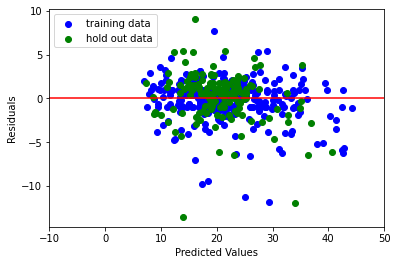

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [12]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  1.547490725900786
MSE train:  5.134412048838637
RMSE train:  2.265924104827573
r2:  0.9595895561156058
MAE test:  1.9891810174827986
MSE test:  7.8953150548909035
RMSE test:  2.80986032658047
r2:  0.9217564427943157
